#### Importing necessary libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stat

#### Loading the dataset

In [346]:
df = pd.read_csv("data/stud.csv")
df.head(15)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### Data Analyzing

In [347]:
df.shape

(1000, 8)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Descriptive stats

In [349]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Preprocessing & Exploration

In [350]:
df.duplicated().sum()

0

In [351]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [352]:
df.isnull().sum().sum()

0

#### Segregating numerical and categorical col

In [353]:
numerical_col = df.select_dtypes(exclude='O').columns.tolist()
categorical_col = df.select_dtypes(include='O').columns.tolist()
print(f"Numerical columns are: {numerical_col}\n")
print(f"Categorical columns are: {categorical_col}")

Numerical columns are: ['math_score', 'reading_score', 'writing_score']

Categorical columns are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Unique values in categorical_col

In [354]:
def uniqueValCount(df,col):
    print(f"The unique value counts for column: {df[col].value_counts()}\n")

for col in categorical_col:
    uniqueValCount(df,col)

The unique value counts for column: gender
female    518
male      482
Name: count, dtype: int64

The unique value counts for column: race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

The unique value counts for column: parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

The unique value counts for column: lunch
standard        645
free/reduced    355
Name: count, dtype: int64

The unique value counts for column: test_preparation_course
none         642
completed    358
Name: count, dtype: int64



#### Most occuring values

In [355]:
for col in categorical_col:
    print(f" Most occurring value in column {col} is '{statistics.mode(df[col])}'\n" )

 Most occurring value in column gender is 'female'

 Most occurring value in column race_ethnicity is 'group C'

 Most occurring value in column parental_level_of_education is 'some college'

 Most occurring value in column lunch is 'standard'

 Most occurring value in column test_preparation_course is 'none'



In [356]:
numerical_col

['math_score', 'reading_score', 'writing_score']

#### Outliers detection

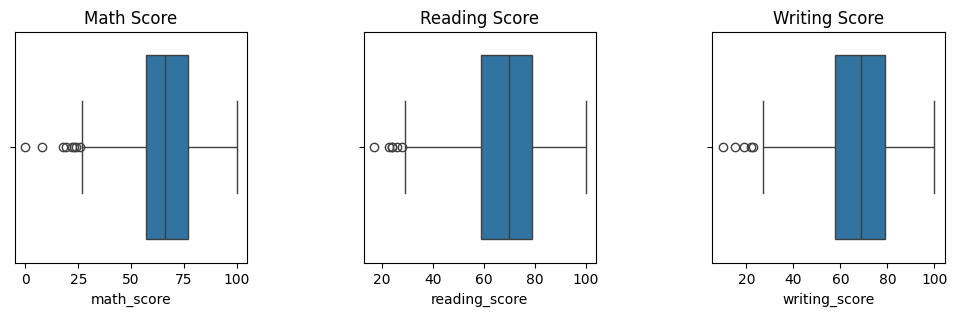

In [357]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.boxplot(df["math_score"],orient='h')
plt.title("Math Score")

plt.subplot(1,3,2)
sns.boxplot(df["reading_score"],orient='h')
plt.title("Reading Score")

plt.subplot(1,3,3)
sns.boxplot(df["writing_score"],orient='h')
plt.title("Writing Score")

plt.subplots_adjust(wspace=0.5)
plt.show()

#### Distributions:

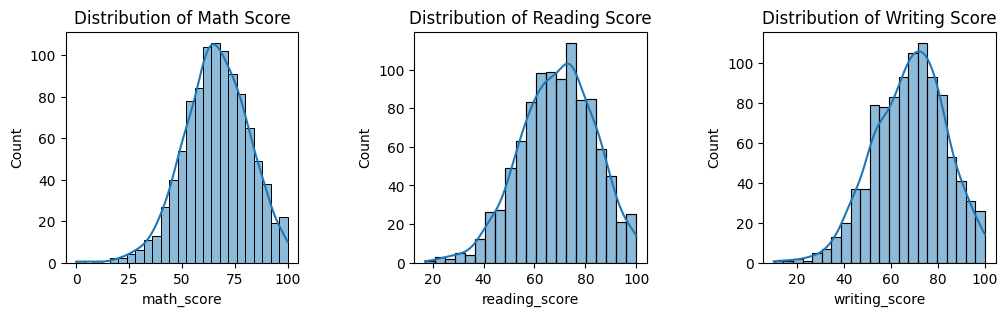

In [358]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.histplot(df["math_score"],kde=True)
plt.title("Distribution of Math Score")

plt.subplot(1,3,2)
sns.histplot(df["reading_score"],kde=True)
plt.title("Distribution of Reading Score")

plt.subplot(1,3,3)
sns.histplot(df["writing_score"],kde=True)
plt.title("Distribution of Writing Score")

plt.subplots_adjust(wspace=0.5)
plt.show()

#### Checking for Normal Distribution of plots

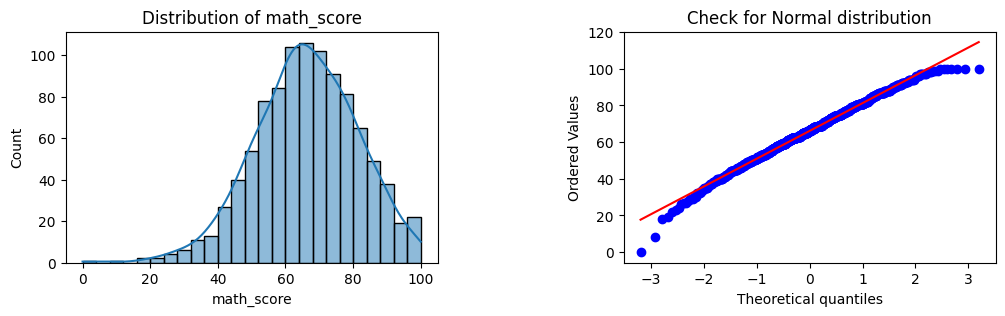

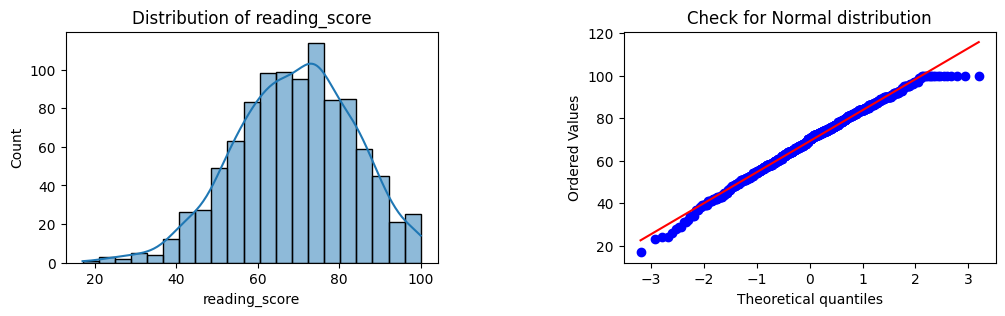

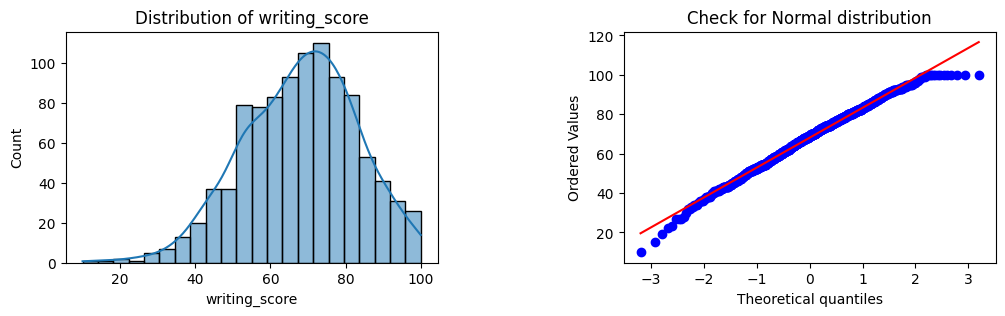

In [359]:
def check_normalDist(df,col):
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.subplot(1,2,2)
    stat.probplot(df[col],dist='norm',plot=plt)
    plt.title(f"Check for Normal distribution")
    plt.subplots_adjust(wspace=0.5)
    plt.show()


for i in numerical_col:
    check_normalDist(df,i)

All the Numerical columns are following normal distribution.

#### Correlation check

In [360]:
corr = df[numerical_col].corr()
corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


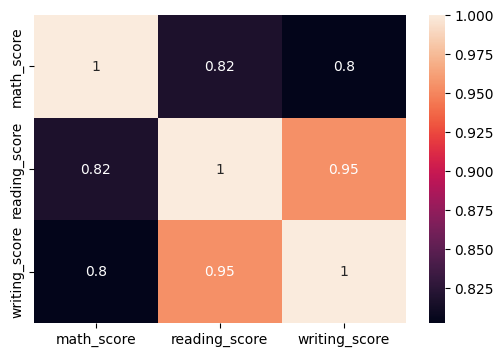

In [361]:
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True)
plt.show()

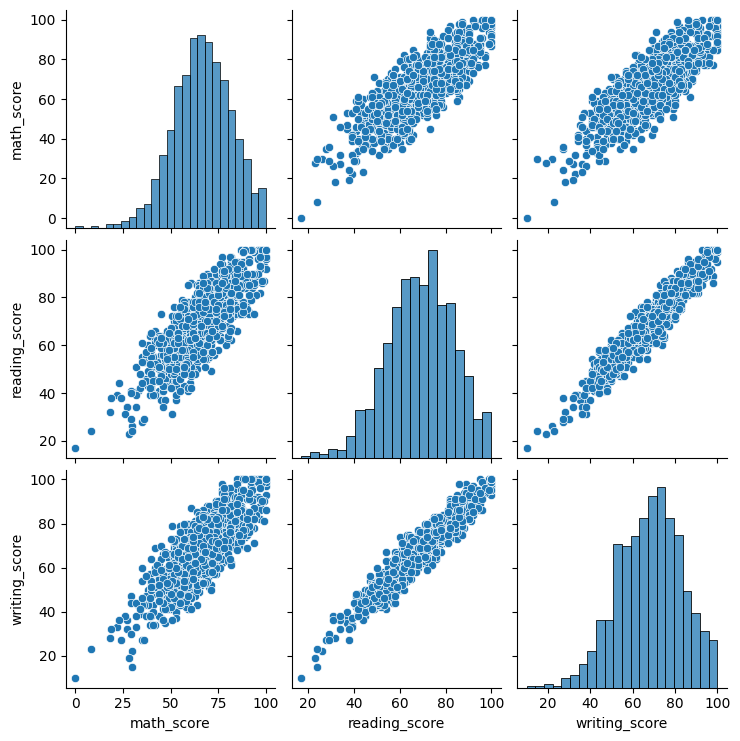

In [362]:
sns.pairplot(df)
plt.show()

#### Feature Engineering

In [363]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score'] // 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


#### Statistics for total score & average score

In [364]:
statistics.mode(df['average_score'])

68

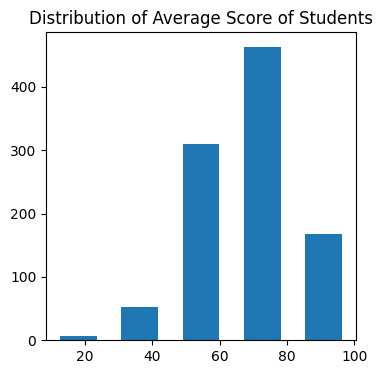

In [365]:
plt.figure(figsize=(4,4))
plt.hist(df['average_score'],bins=5,rwidth=0.6)
plt.title("Distribution of Average Score of Students")
plt.show()

In [366]:
pie_plot_data = {}
def count_students_by_marks(df,col):
    avg = np.mean(df[col])
    studentsExact100 = df[df[col] == 100][col].count()
    studentsBelowAvg = df[df[col] < avg][col].count()
    studentsAboveAvg = df.shape[0] - studentsBelowAvg
    per_Exact100 = (studentsExact100/df.shape[0])*100
    per_BelowAvg = (studentsBelowAvg/df.shape[0])*100
    per_AboveAvg = (studentsAboveAvg/df.shape[0])*100
    pie_plot_data[col] = [np.round(per_AboveAvg,2), np.round(per_BelowAvg,2)]
    
    print(f"column {col}:")
    print(f"The number of students scoring exactly 100 marks are '{studentsExact100}' which is '{per_Exact100:.2f}%' ")
    print(f"The number of students below average {avg:.2f} are '{studentsBelowAvg}' which is '{per_BelowAvg:.2f}%' ")
    print(f"The number of students above average {avg:.2f} are '{studentsAboveAvg}' which is '{per_AboveAvg:.2f}%' ")
    print(f"The percentile rank for average marks {avg:.2f} is '{stat.percentileofscore(df[col],avg):.2f}%'\n")

for col in numerical_col:
    count_students_by_marks(df,col)

column math_score:
The number of students scoring exactly 100 marks are '7' which is '0.70%' 
The number of students below average 66.09 are '507' which is '50.70%' 
The number of students above average 66.09 are '493' which is '49.30%' 
The percentile rank for average marks 66.09 is '50.70%'

column reading_score:
The number of students scoring exactly 100 marks are '17' which is '1.70%' 
The number of students below average 69.17 are '487' which is '48.70%' 
The number of students above average 69.17 are '513' which is '51.30%' 
The percentile rank for average marks 69.17 is '48.70%'

column writing_score:
The number of students scoring exactly 100 marks are '14' which is '1.40%' 
The number of students below average 68.05 are '488' which is '48.80%' 
The number of students above average 68.05 are '512' which is '51.20%' 
The percentile rank for average marks 68.05 is '48.80%'



In [367]:
pie_plot_data

{'math_score': [49.3, 50.7],
 'reading_score': [51.3, 48.7],
 'writing_score': [51.2, 48.8]}

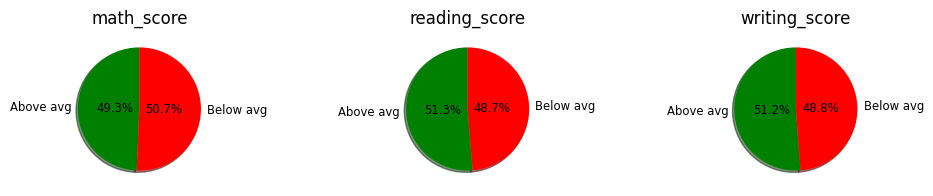

In [368]:
def pie_plot_figure(df,col,labels,colors,idx):
    plt.subplot(1,3,idx)
    plt.pie(df[col],shadow=True,startangle=90,labels=labels,autopct='%1.1f%%',
            pctdistance=0.4,labeldistance=1.1, textprops={'size':'smaller'},colors=colors)
    plt.title(col)


plt.figure(figsize=(12,2))
labels = ['Above avg','Below avg']
colors =['green','red']
for i in range(len(numerical_col)):
    pie_plot_figure(pie_plot_data,numerical_col[i],labels,colors,i+1)

plt.show()

#### Maximum of the students fall in which marks range?

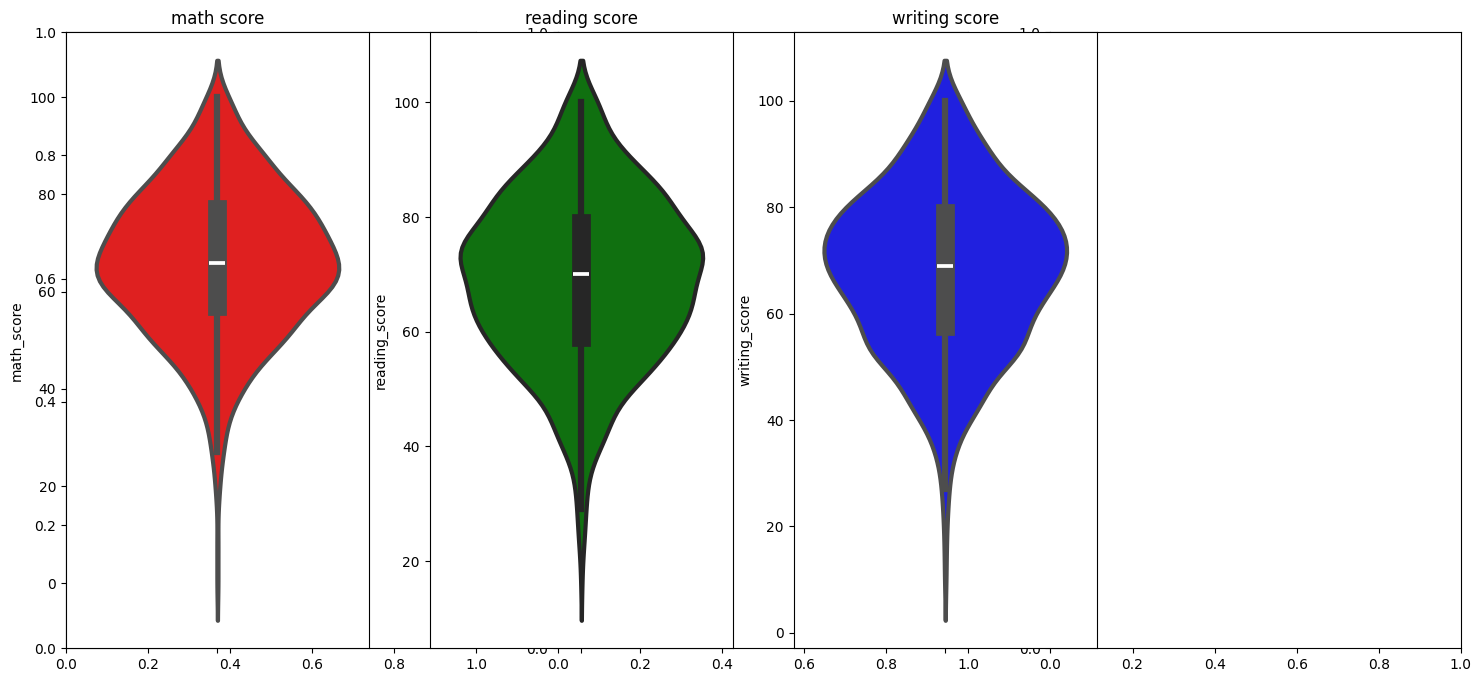

In [402]:
plt.subplots(1,3,figsize=(18,8))

plt.subplot(141)
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.title('math score')

plt.subplot(142)
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.title('reading score')

plt.subplot(143)
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.title('writing score')

plt.show()

In math, most of the students lie in 60-80 marks range whereas in reading & writing, students lie in 50-80 range

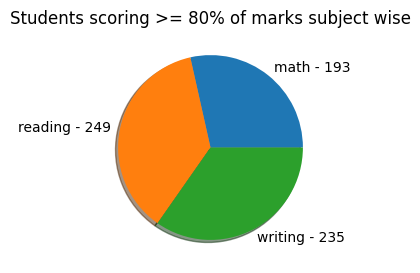

In [369]:
#students scoring more than or equal to 80%

math_80 = df[df['math_score'] >=80]['math_score'].count()
reading_80 = df[df['reading_score'] >=80]['reading_score'].count()
writing_80 = df[df['writing_score'] >=80]['writing_score'].count()

score_80 = [math_80, reading_80, writing_80]
labels = [f'math - {math_80}',f'reading - {reading_80}',f'writing - {writing_80}']

plt.figure(figsize=(4,3))
plt.pie(score_80,shadow=True,startangle=0,labels=labels)
plt.title("Students scoring >= 80% of marks subject wise")
plt.show()

#### How is gender distributed in the dataset?

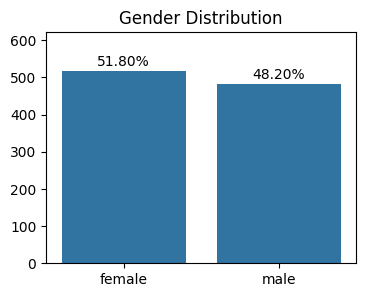

In [370]:
#How is gender distributed in the dataset?

plt.figure(figsize=(4,3))

total_students = df.shape[0]
data = df.gender.value_counts()
index = data.index.tolist()
value = data.values.tolist()
female_proportion = value[0] / total_students
male_proportion = value[1] / total_students
proportion = [female_proportion,male_proportion]

sns.barplot(x=index,y=value)
plt.title("Gender Distribution")

for idx, num in enumerate(value):
    plt.text(idx,num +5, f"{proportion[idx]*100:.2f}%" ,va='bottom',ha='center')

max_count = max(value)
plt.ylim(0,max_count+max_count*0.2)
plt.show()

#### Distribition in other categorical columns

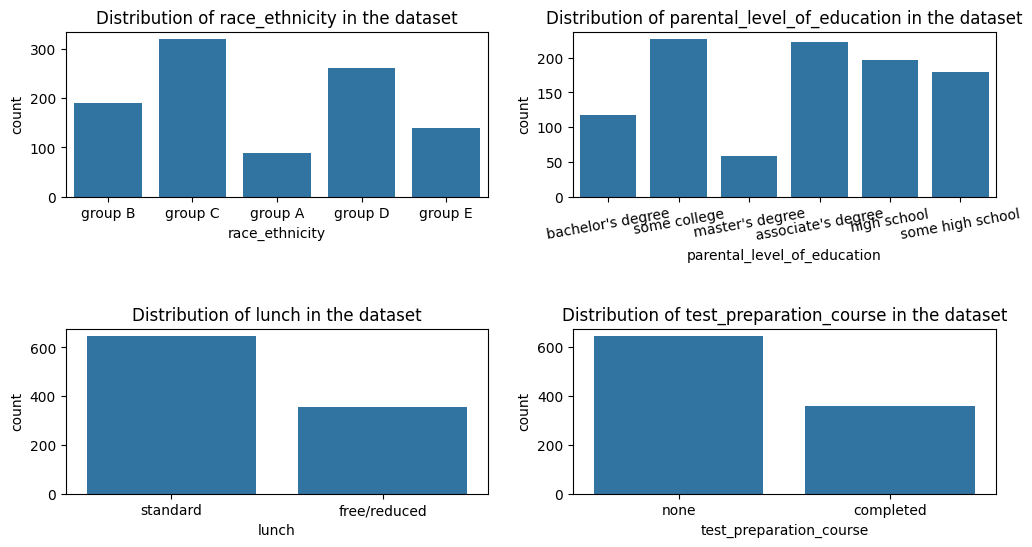

In [371]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.countplot(x=categorical_col[1],data=df)
plt.title(f"Distribution of {categorical_col[1]} in the dataset")

plt.subplot(2,2,2)
sns.countplot(x=categorical_col[2],data=df)
plt.title(f"Distribution of {categorical_col[2]} in the dataset")
plt.xticks(rotation=10)

plt.subplot(2,2,3)
sns.countplot(x=categorical_col[3],data=df)
plt.title(f"Distribution of {categorical_col[3]} in the dataset")

plt.subplot(2,2,4)
sns.countplot(x=categorical_col[4],data=df)
plt.title(f"Distribution of {categorical_col[4]} in the dataset")
plt.subplots_adjust(hspace=0.8)

plt.show()

### Various other univariate, bivariate and multivariate analysis

 #### Subject-wise Top 3 students

In [372]:
toppers_maths = df.nlargest(3, 'math_score')['gender'].tolist()
toppers_reading = df.nlargest(3, 'reading_score')['gender'].tolist()
toppers_writing = df.nlargest(3, 'writing_score')['gender'].tolist()
toppers = {"Maths":toppers_maths,"Reading":toppers_reading,"Writing":toppers_writing}

for subject, toppers in toppers.items():
    print(f"Top 3 students in {subject}:\n1. {toppers[0]}\n2. {toppers[1]}\n3. {toppers[2]}")

print('*'*150)

Top 3 students in Maths:
1. male
2. female
3. female
Top 3 students in Reading:
1. female
2. female
3. male
Top 3 students in Writing:
1. female
2. female
3. female
******************************************************************************************************************************************************


#### Top 10 Students

In [373]:
df.nlargest(10, 'total_score')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100
962,female,group E,associate's degree,standard,none,100,100,100,300,100
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99
179,female,group D,some high school,standard,completed,97,100,100,297,99
712,female,group D,some college,standard,none,98,100,99,297,99
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98
625,male,group D,some college,standard,completed,100,97,99,296,98
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97
685,female,group E,master's degree,standard,completed,94,99,100,293,97


In [374]:
# Top 10 Students
print(f"Top 10 students marks in the dataset: {df.nlargest(10, 'total_score')['total_score'].tolist()}")
print('*'*150)

Top 10 students marks in the dataset: [300, 300, 300, 299, 297, 297, 296, 296, 293, 293]
******************************************************************************************************************************************************


#### Top 10 students gender distribution

In [375]:
# Top 10 students gender distribution
print(df.nlargest(10, 'total_score')['gender'].value_counts())
print('*'*150)

gender
female    7
male      3
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Top 10 students lunch distribution

In [376]:
print(df.nlargest(10, 'total_score')['lunch'].value_counts())
print('*'*150)

lunch
standard        9
free/reduced    1
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Top 10 students course distribution

In [377]:
print(df.nlargest(10, 'total_score')['test_preparation_course'].value_counts())
print('*'*150)

test_preparation_course
completed    7
none         3
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Top 10 students race/ethnicity check

In [378]:
print(df.nlargest(10, 'total_score')['race_ethnicity'].value_counts())
print('*'*150)

race_ethnicity
group E    6
group D    3
group C    1
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Top 300 students distribution

In [379]:
# Top 300 students gender distribution
print(df.nlargest(300, 'total_score')['gender'].value_counts())
print('-'*150)

print(df.nlargest(300, 'total_score')['lunch'].value_counts())
print('-'*150)

print(df.nlargest(300, 'total_score')['test_preparation_course'].value_counts())
print('-'*150)

print(df.nlargest(300, 'total_score')['race_ethnicity'].value_counts())
print('*'*150)

gender
female    176
male      124
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
lunch
standard        232
free/reduced     68
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
test_preparation_course
completed    151
none         149
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
race_ethnicity
group C    88
group D    82
group E    60
group B    52
group A    18
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Passing score is at least 40% in total then the distribution for failing the exam :

In [380]:
# Passing score is at least 40% in total then the distribution for failing the exam :
passing_score = 0.40*300
print(f"Distribution of gender who are failing the exam: {df[df['total_score'] < passing_score]['gender'].value_counts()}")
print('-'*150)

print(f"Distribution of lunch who are failing the exam: {df[df['total_score'] < passing_score]['lunch'].value_counts()}")
print('-'*150)

print(f"Distribution of test_preparation_course who are failing the exam: {df[df['total_score'] < passing_score]['test_preparation_course'].value_counts()}")
print('-'*150)

print(f"Distribution of race_ethnicity who are failing the exam: {df[df['total_score'] < passing_score]['race_ethnicity'].value_counts()}")
print('*'*150)

Distribution of gender who are failing the exam: gender
female    16
male      14
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution of lunch who are failing the exam: lunch
free/reduced    24
standard         6
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution of test_preparation_course who are failing the exam: test_preparation_course
none         27
completed     3
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution of race_ethnicity who are failing the exam: race_ethnicity
group C    10
group B     8
group D     7
group A     3
group E     2
Name: count, dtype: int64
*****

#### Course completion details for each subject who scored at least 80%

In [381]:
math_80_courseDetails = df[df['math_score'] >=80]['test_preparation_course'].value_counts()
reading_80_courseDetails = df[df['reading_score'] >=80]['test_preparation_course'].value_counts()
writing_80_courseDetails = df[df['writing_score'] >=80]['test_preparation_course'].value_counts()

print("Course completion details for each subject who scored at least 80%")
print(math_80_courseDetails)
print('-'*150)

print(reading_80_courseDetails)
print('-'*150)

print(writing_80_courseDetails)
print('*'*150)

Course completion details for each subject who scored at least 80%
test_preparation_course
none         105
completed     88
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
test_preparation_course
completed    130
none         119
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
test_preparation_course
completed    132
none         103
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Course completion details of students who scored at least 80% in total

In [382]:
marks = 0.80*300
print("Course completion details of students who scored at least 80% in total")
print(df[df['total_score'] >=marks]['test_preparation_course'].value_counts())
print("*"*150)

Course completion details of students who scored at least 80% in total
test_preparation_course
completed    107
none          91
Name: count, dtype: int64
******************************************************************************************************************************************************


#### Gender distribution in different groups - race_ethnicity

In [383]:
df.groupby('race_ethnicity')['gender'].value_counts()

race_ethnicity  gender
group A         male       53
                female     36
group B         female    104
                male       86
group C         female    180
                male      139
group D         male      133
                female    129
group E         male       71
                female     69
Name: count, dtype: int64

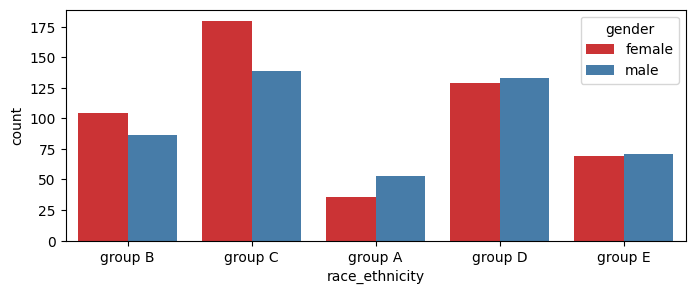

In [384]:
plt.figure(figsize=(8,3))
sns.countplot(data=df,x='race_ethnicity',hue='gender',palette="Set1")
plt.show()

#### Impact of Parental Education

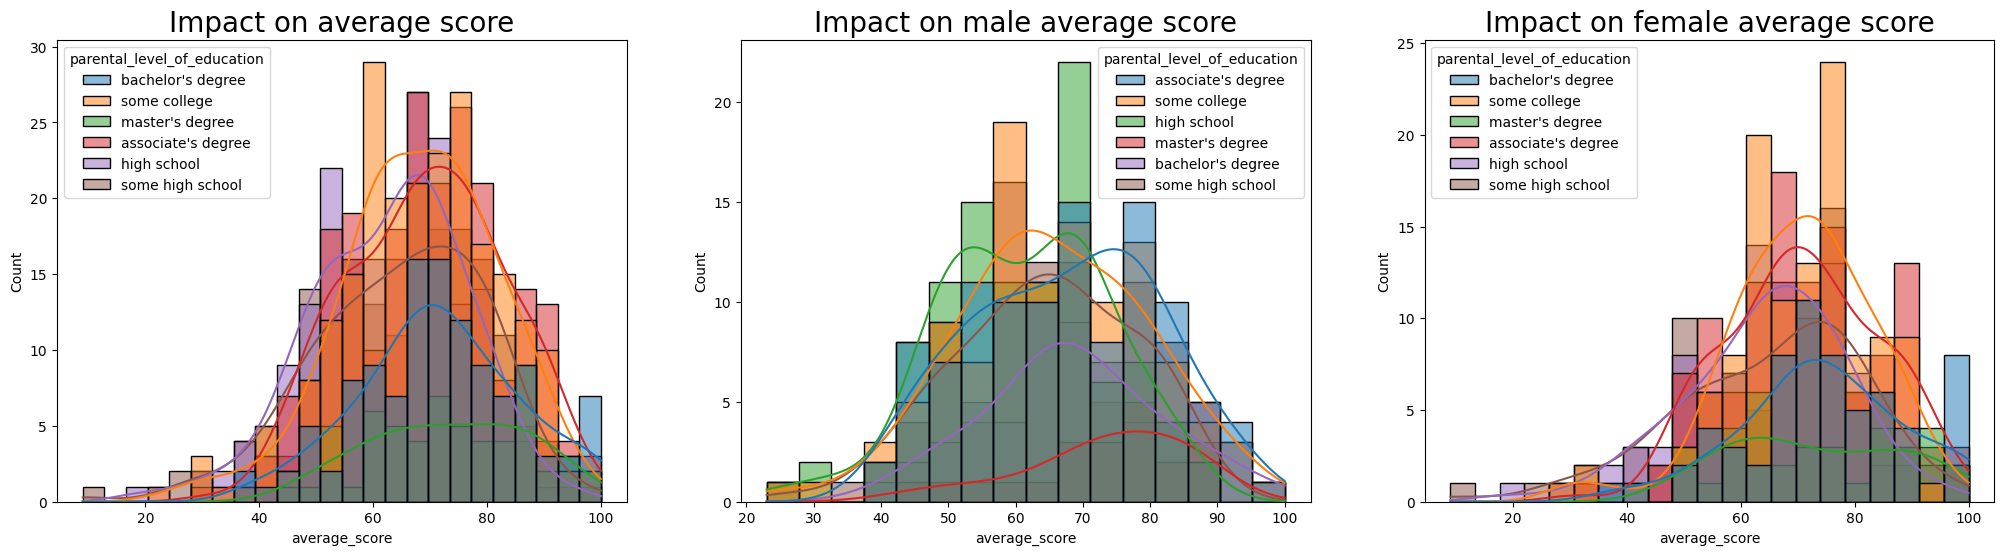

In [403]:
# On average score

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on average score",fontsize=20)

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x="average_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on male average score",fontsize=20)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x="average_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on female average score",fontsize=20)

plt.show()

"Some college" parental education affect the average results

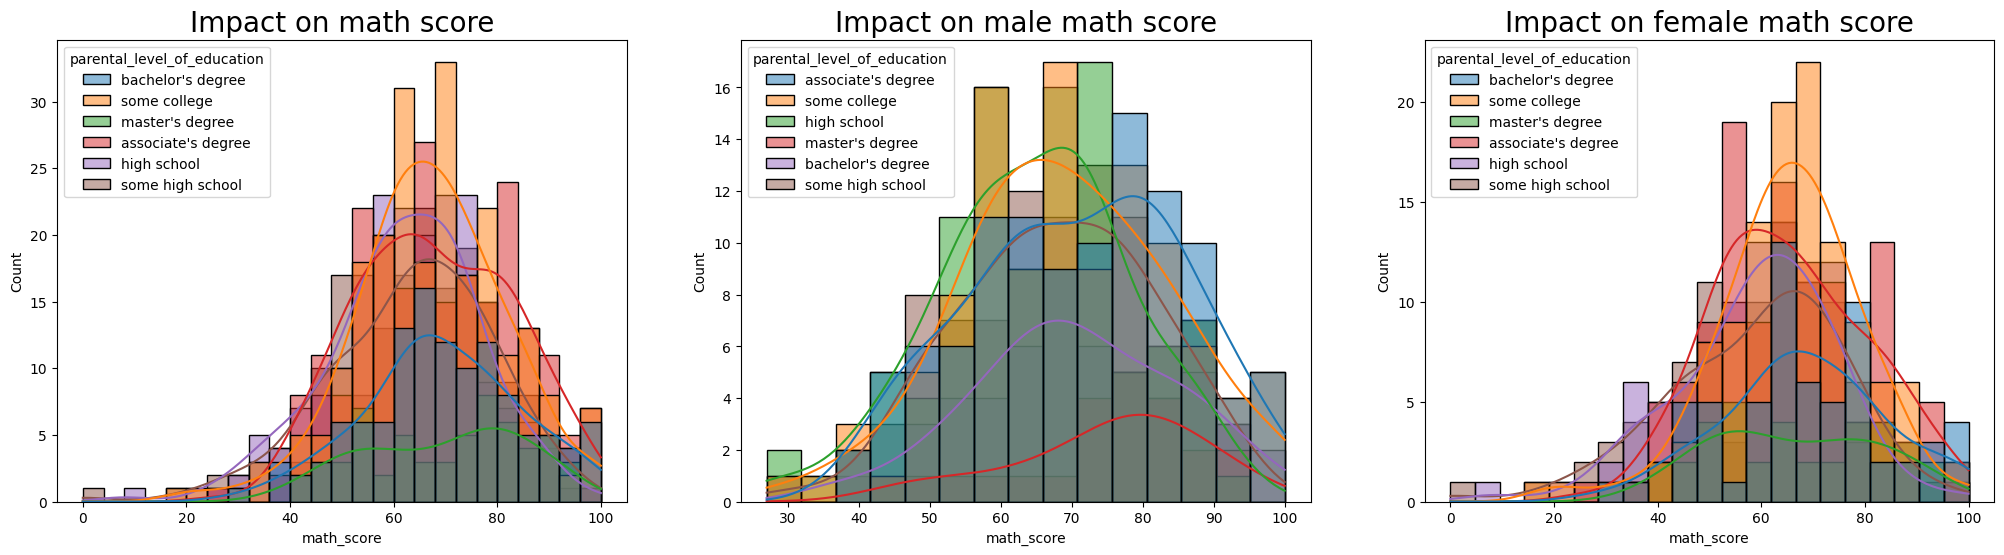

In [404]:
# In math score

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="math_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on math score",fontsize=20)

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x="math_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on male math score",fontsize=20)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x="math_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on female math score",fontsize=20)

plt.show()

Males : Impact of "Some college" & "High school" parental education

Females : Impact of "Some college" parental education

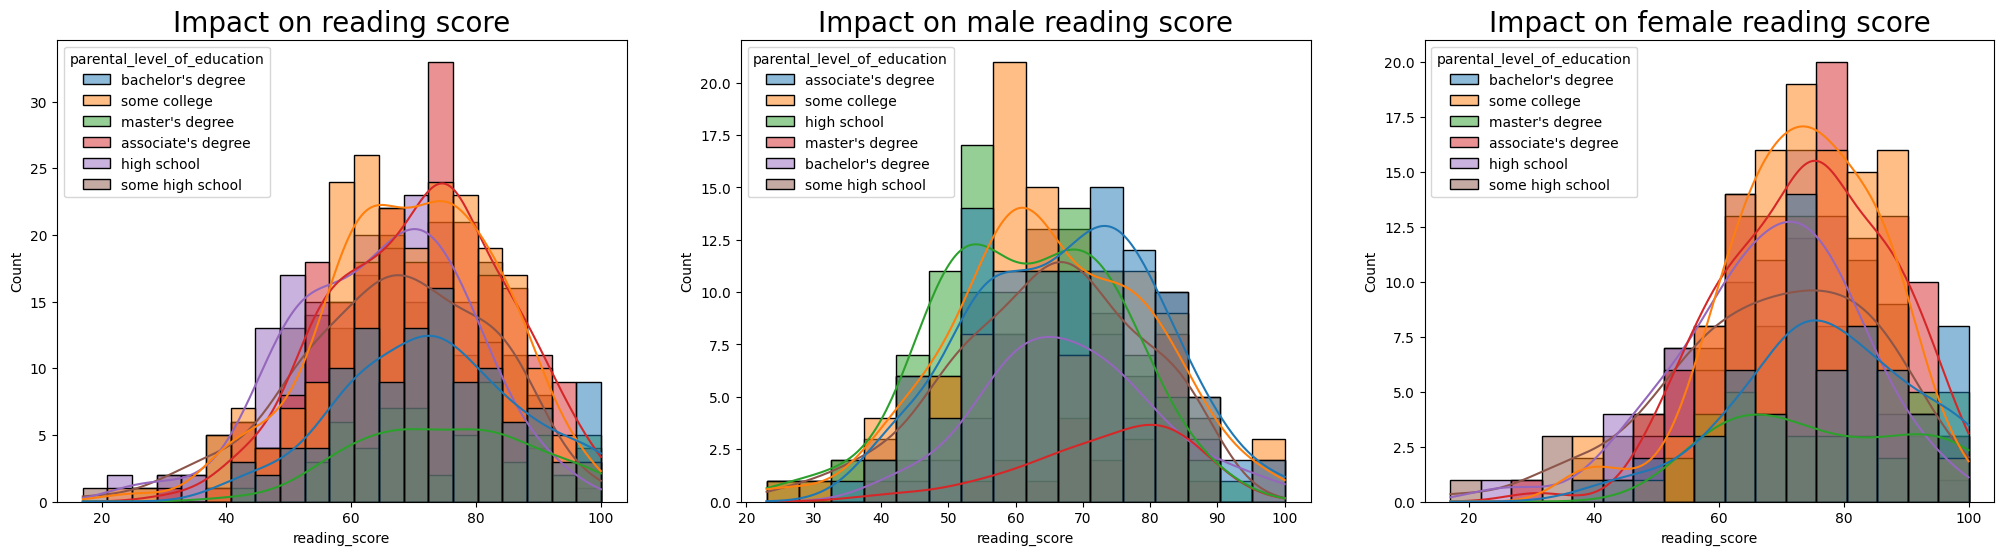

In [405]:
# In reading score

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="reading_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on reading score",fontsize=20)

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x="reading_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on male reading score",fontsize=20)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x="reading_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on female reading score",fontsize=20)

plt.show()

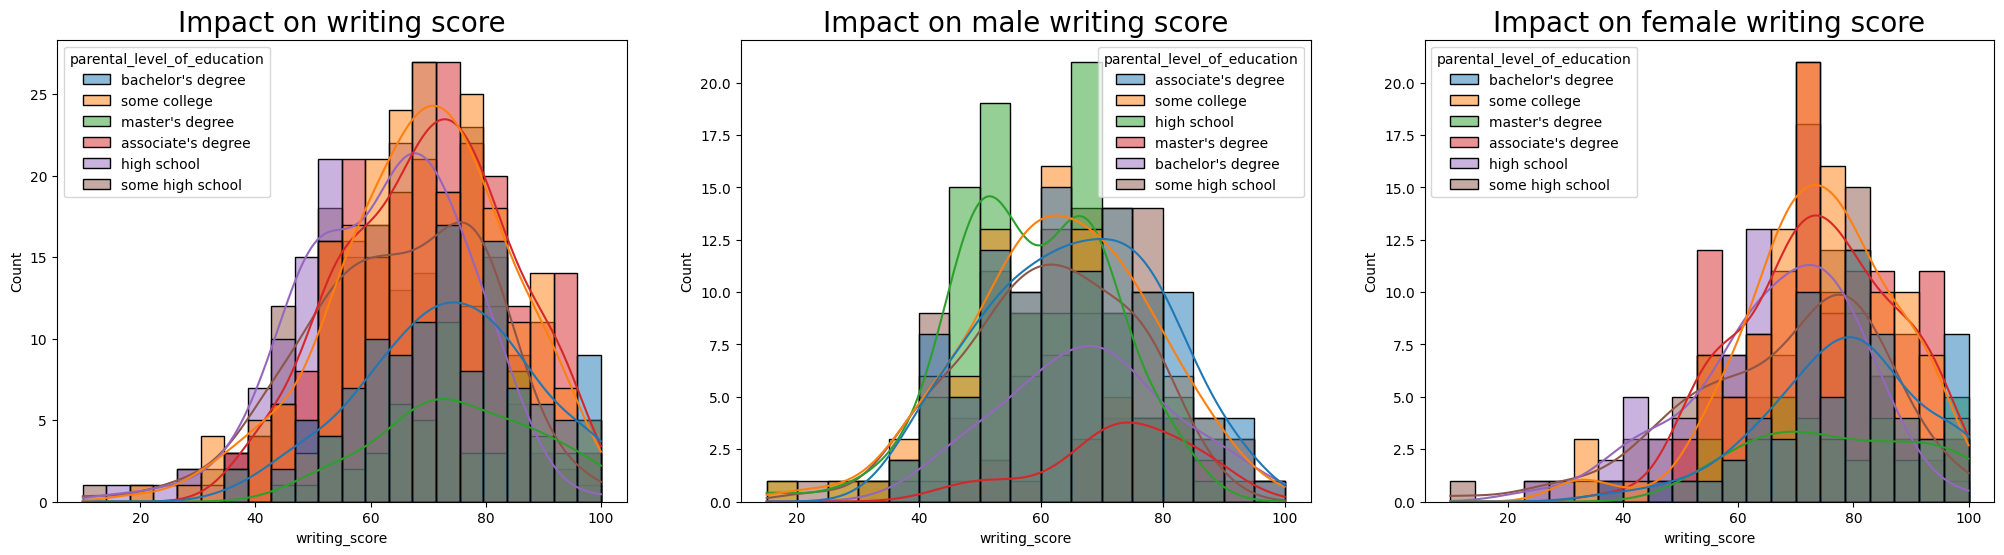

In [406]:
# In writing score

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="writing_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on writing score",fontsize=20)

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x="writing_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on male writing score",fontsize=20)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x="writing_score",hue='parental_level_of_education',kde=True)
plt.title("Impact on female writing score",fontsize=20)

plt.show()

"Associate's degree" parental education is giving tough competition in reading and writing score of students.

#### Impact of lunch

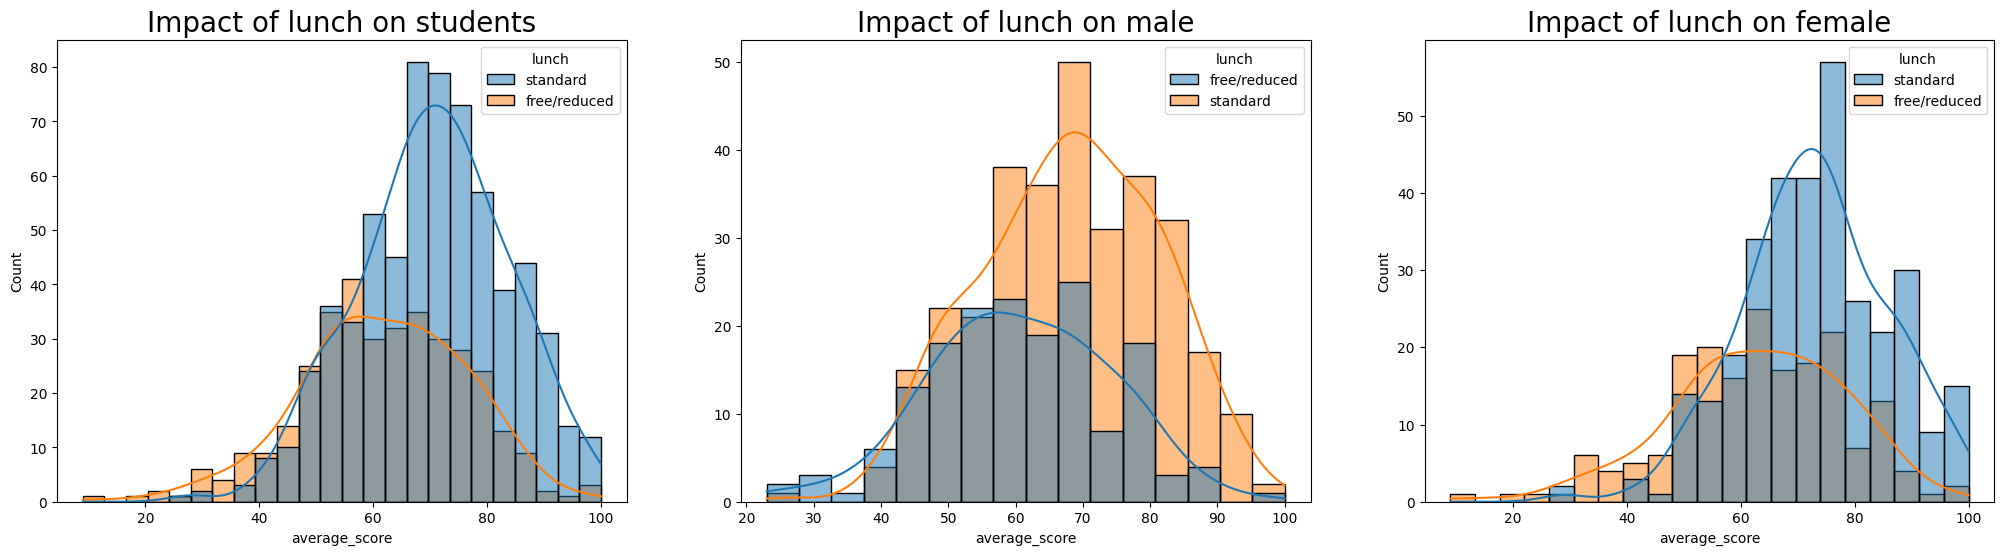

In [407]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",hue='lunch',kde=True)
plt.title("Impact of lunch on students",fontsize=20)

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x="average_score",hue='lunch',kde=True)
plt.title("Impact of lunch on male",fontsize=20)

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x="average_score",hue='lunch',kde=True)
plt.title("Impact of lunch on female",fontsize=20)

plt.show()

Standard lunch is impacting overall performance

## Conclusions:

<pre>
o> Student performance depends on race/ethnicity, parental education, and lunch. 
o> Females are the top performers. 
o> Standard lunch benefited students. 
o> Parents with a college degree impacted students' performance. 
o> The course did not have some impact but benefited them. 
o> Math has somewhat low results. 
o> The average score is near 70 marks in each subject.
</pre>